In [3]:

import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [6]:

# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\archive.zip")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (62, 17)


,Unnamed: 0,Name,Roll No,Program,Branch,Semester,Status,Session,AL401- [T],AL402- [T],AL403- [P],AL404- [P],AL405- [P],AL406- [P],Result Description,SGPA,CGPA
0,0,AAKASH PIPALDE,0403AL231001,B.Tech,AL,4,Regular,June-2025,C+,B,A,A,A,A,PASS,7.08,6.71
1,1,AAYUSH PATEL,0403AL231002,B.Tech,AL,4,Regular,June-2025,B,B,B,B,B,B,PASS,6.46,6.38
2,3,ABIR SAXENA,0403AL231004,B.Tech,AL,4,Regular,June-2025,D,C,B,B,B,B,PASS WITH GRACE,5.38,5.50
3,4,AMEY BHOKARIKAR,0403AL231005,B.Tech,AL,4,Regular,June-2025,C,B,A,A,A,A,PASS WITH GRACE,6.71,6.82
4,7,ANTIM JAMLE,0403AL231008,B.Tech,AL,4,Regular,June-2025,F,C+,B+,B+,B+,B+,Fail in AL401,5.33,5.29


In [7]:

# Descriptive statistics
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,62.0,NaN,NaN,NaN,38.822581,22.654587,0.0,19.25,38.0,58.75,77.0
Name,62,62,AAKASH PIPALDE,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roll No,62,62,0403AL231001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Program,62,1,B.Tech,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,62,1,AL,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semester,62.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
Status,62,1,Regular,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Session,62,1,June-2025,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL401- [T],62,7,C,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL402- [T],62,7,B,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

# Identify columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

numeric_cols, categorical_cols


(['Unnamed: 0', 'Semester', 'SGPA', 'CGPA'],
 ['Name',
  'Roll No',
  'Program',
  'Branch',
  'Status',
  'Session',
  'AL401- [T]',
  'AL402- [T]',
  'AL403- [P]',
  'AL404- [P]',
  'AL405- [P]',
  'AL406- [P]',
  'Result Description'])

In [9]:

# Target variable selection
target = numeric_cols[0]
predictors = [c for c in numeric_cols if c != target]

target, predictors


('Unnamed: 0', ['Semester', 'SGPA', 'CGPA'])

In [15]:

# VIF calculation
X = sm.add_constant(df[predictors].dropna())
pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})


,Variable,VIF
0,Semester,59.897717
1,SGPA,8.900494
2,CGPA,8.900494


In [18]:

# One-sample T-test
stats.ttest_1samp(df[target].dropna(), 0)


TtestResult(statistic=np.float64(13.493484073658628), pvalue=np.float64(5.694941490021612e-20), df=np.int64(61))

In [19]:

# Chi-square test
table = pd.crosstab(df[categorical_cols[0]], df[categorical_cols[1]])
stats.chi2_contingency(table)


Chi2ContingencyResult(statistic=np.float64(3782.0), pvalue=np.float64(0.23854308336755617), dof=3721, expected_freq=array([[0.01612903, 0.01612903, 0.01612903, ..., 0.01612903, 0.01612903,
        0.01612903],
       [0.01612903, 0.01612903, 0.01612903, ..., 0.01612903, 0.01612903,
        0.01612903],
       [0.01612903, 0.01612903, 0.01612903, ..., 0.01612903, 0.01612903,
        0.01612903],
       ...,
       [0.01612903, 0.01612903, 0.01612903, ..., 0.01612903, 0.01612903,
        0.01612903],
       [0.01612903, 0.01612903, 0.01612903, ..., 0.01612903, 0.01612903,
        0.01612903],
       [0.01612903, 0.01612903, 0.01612903, ..., 0.01612903, 0.01612903,
        0.01612903]], shape=(62, 62)))

In [20]:

# One-way ANOVA
anova_col = [c for c in categorical_cols if df[c].nunique() >= 3][0]
groups = [g[target].dropna().values for _, g in df.groupby(anova_col)]
stats.f_oneway(*groups)


F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))

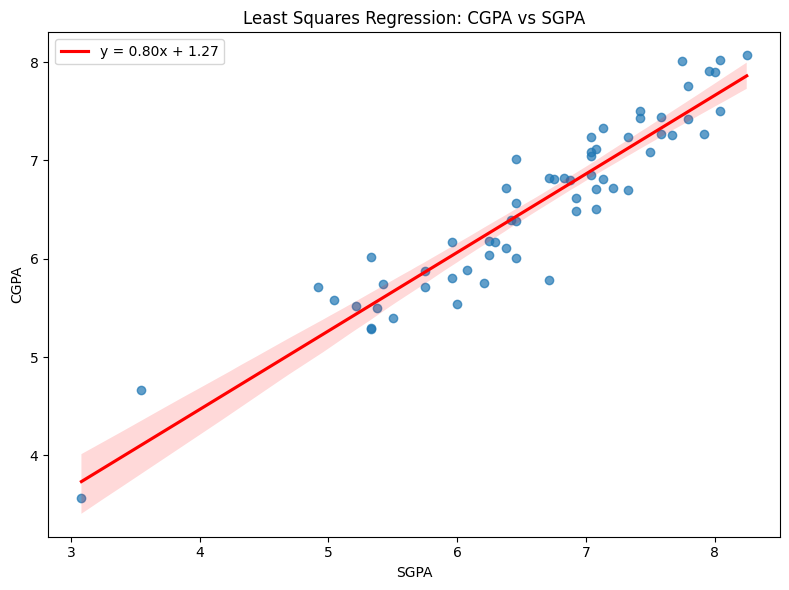

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r"C:\Users\hp\Downloads\archive.zip")

# --- PLOT COMMAND USING SEABORN ---
x_var = 'SGPA'
y_var = 'CGPA'

# Calculate linear regression stats to get the equation for the legend
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_var], df[y_var])

# 1. Initialize the plot
plt.figure(figsize=(8, 6))

# 2. Use regplot: it plots the scatter points and the regression line automatically
sns.regplot(x=x_var, y=y_var, data=df,
            scatter_kws={'alpha': 0.7}, # Scatter point transparency
            line_kws={'color': 'red', 'label': f'y = {slope:.2f}x + {intercept:.2f}'})

# 3. Final Touches
plt.title(f'Least Squares Regression: {y_var} vs {x_var}')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.legend()
plt.tight_layout()

# 4. Show/Save the plot
plt.savefig('least_squares_plot.png')
# plt.show() # Use this command in your actual notebook to display the plot inline

In [29]:
#Multiple Linear Regression 
import statsmodels.formula.api as smf

# Safer formula construction
formula = f"Q('{target}') ~ " + " + ".join([f"Q('{x}')" for x in predictors])

multi_model = smf.ols(formula, data=df).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Q('Unnamed: 0')   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.674
Date:                Wed, 10 Dec 2025   Prob (F-statistic):              0.196
Time:                        14:59:09   Log-Likelihood:                -279.22
No. Observations:                  62   AIC:                             564.4
Df Residuals:                      59   BIC:                             570.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5698      1.296      1.984

                            OLS Regression Results                            
Dep. Variable:        Q('Unnamed: 0')   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 10 Dec 2025   Prob (F-statistic):                nan
Time:                        15:02:30   Log-Likelihood:                -280.93
No. Observations:                  62   AIC:                             563.9
Df Residuals:                      61   BIC:                             566.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2837      0.169     13.493

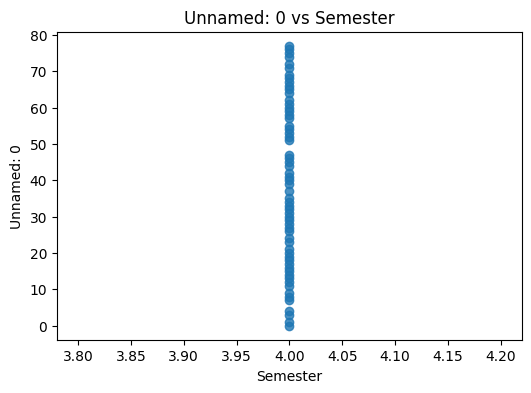

                            OLS Regression Results                            
Dep. Variable:        Q('Unnamed: 0')   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6800
Date:                Wed, 10 Dec 2025   Prob (F-statistic):              0.413
Time:                        15:02:31   Log-Likelihood:                -280.58
No. Observations:                  62   AIC:                             565.2
Df Residuals:                      60   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.7187     18.542      1.279      0.2

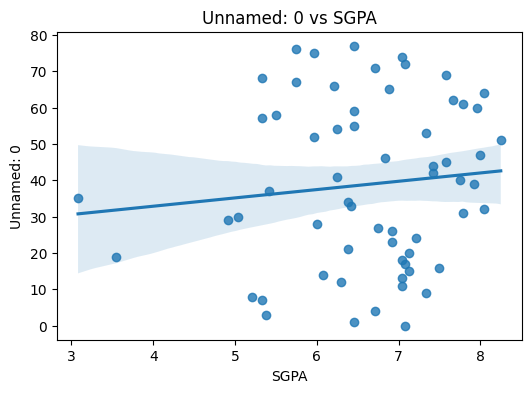

                            OLS Regression Results                            
Dep. Variable:        Q('Unnamed: 0')   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.05639
Date:                Wed, 10 Dec 2025   Prob (F-statistic):              0.813
Time:                        15:02:32   Log-Likelihood:                -280.90
No. Observations:                  62   AIC:                             565.8
Df Residuals:                      60   BIC:                             570.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7087     21.730      1.551      0.1

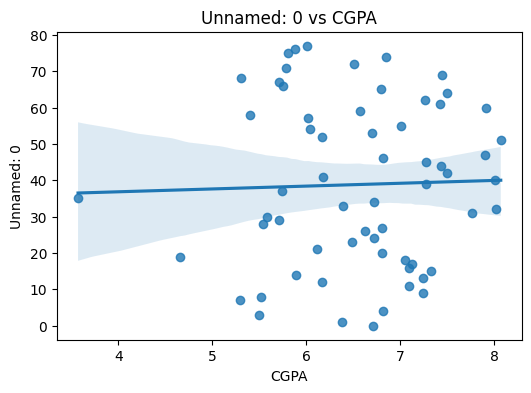

In [31]:
#Simple Linear Regression 
for x in predictors:
    model = smf.ols(f"Q('{target}') ~ Q('{x}')", data=df).fit()
    print(model.summary())
    
    plt.figure(figsize=(6,4))
    sns.regplot(x=x, y=target, data=df)
    plt.title(f"{target} vs {x}")
    plt.show()   # <-- fixed indentation
    

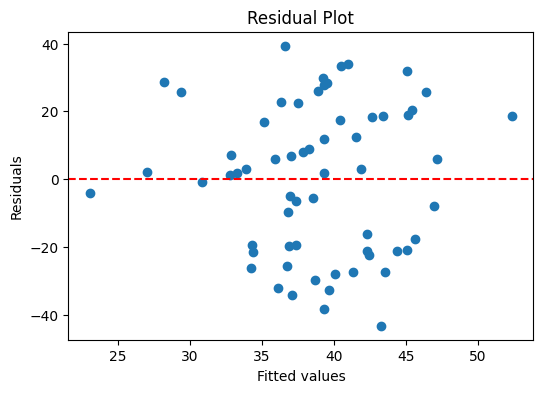

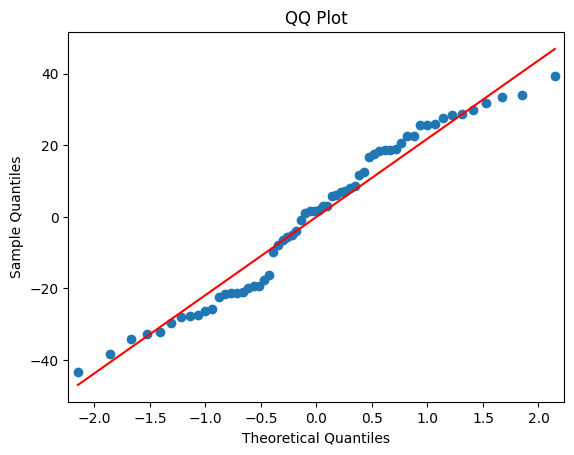

In [32]:
# Residual plot: fitted vs residuals
plt.figure(figsize=(6,4))
plt.scatter(multi_model.fittedvalues, multi_model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# QQ plot
sm.qqplot(multi_model.resid, line='s')
plt.title("QQ Plot")
plt.show()